In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs  
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center; font-family: 'Lucida Sans', 'Lucida Grande', sans-serif; font-size: 24px; font-weight: bold; margin-bottom: 10px;">
    GLOBAL SEA LEVEL RISE (CMEMS) [mm/yr]
</div>

<div style="text-align: center;">
    <img src="GLOBAL_OMI_SL_regional_trends-hq.png" alt="GLOBAL SEA LEVEL RISE (CMEMS)" width="400"/>
</div>

<div style="text-align: center; font-family: 'Courier New', Courier, monospace; font-size: 14px; margin-top: 5px;">
    DOI: OMI_CLIMATE_SL_GLOBAL_regional_trends
</div>


In [3]:
# Load dataset and dataarrays
ds = xr.open_dataset('omi_climate_sl_global_regional_trends_19930101_P20240228.nc')
sea_level_trend = ds['trend_GIA_TPA_corrected']
sea_level_acceleration = ds['acceleration_TPA_corrected']

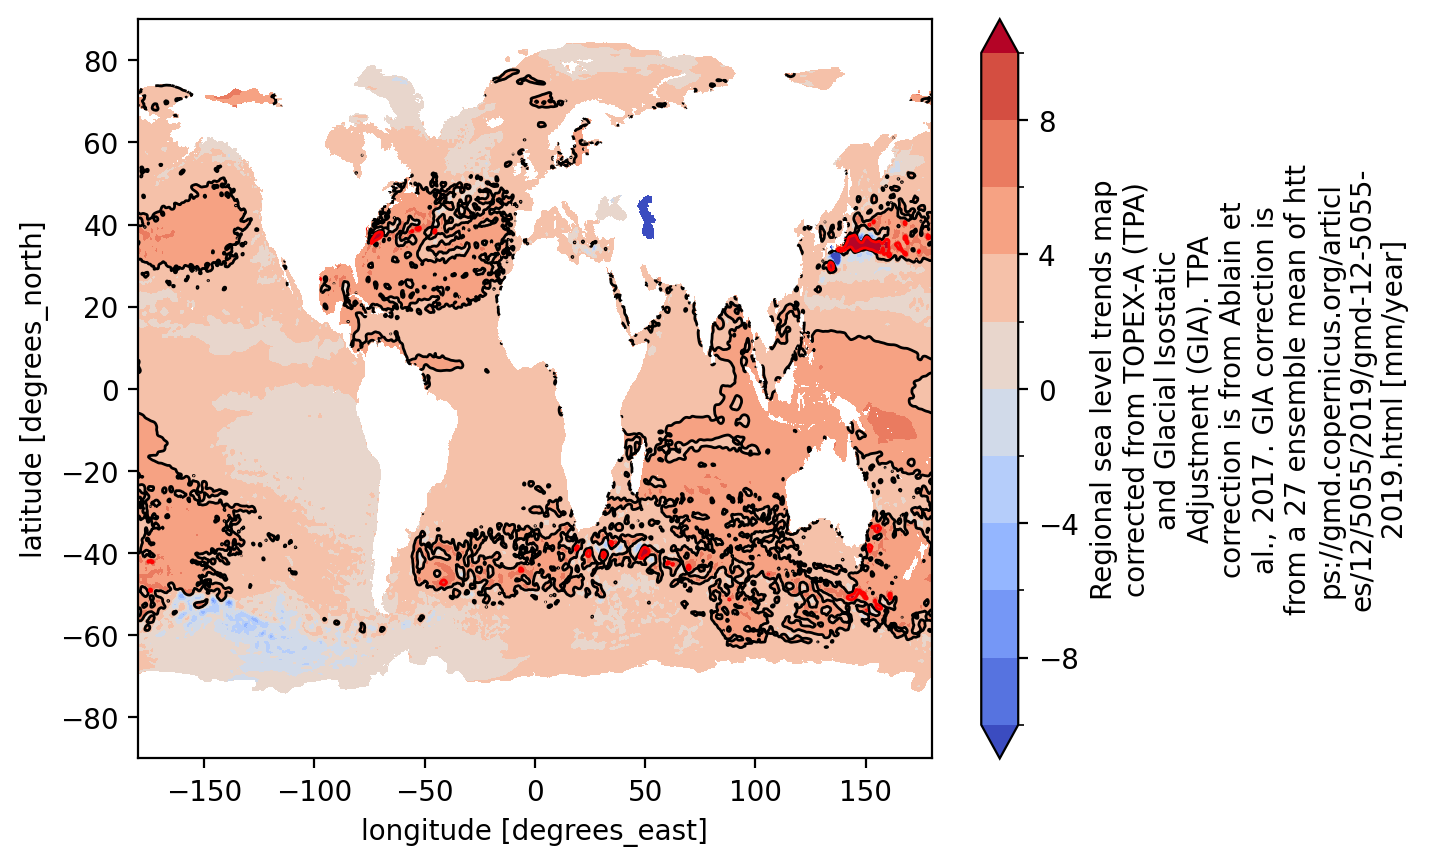

In [ ]:
# Transpose and display trend map
sea_level_trend = sea_level_trend.transpose("latitude", "longitude")
sea_level_trend.plot(levels=np.linspace(-10,10,11), vmin=-10, vmax=10, cmap='coolwarm')
sea_level_trend.plot.contour(levels=[4, 8], colors=['k', 'r'], linewidths=1)

In [30]:
# Mask some values
masked_sea_level_trend = sea_level_trend.where((sea_level_trend < -4) | (sea_level_trend > 4))

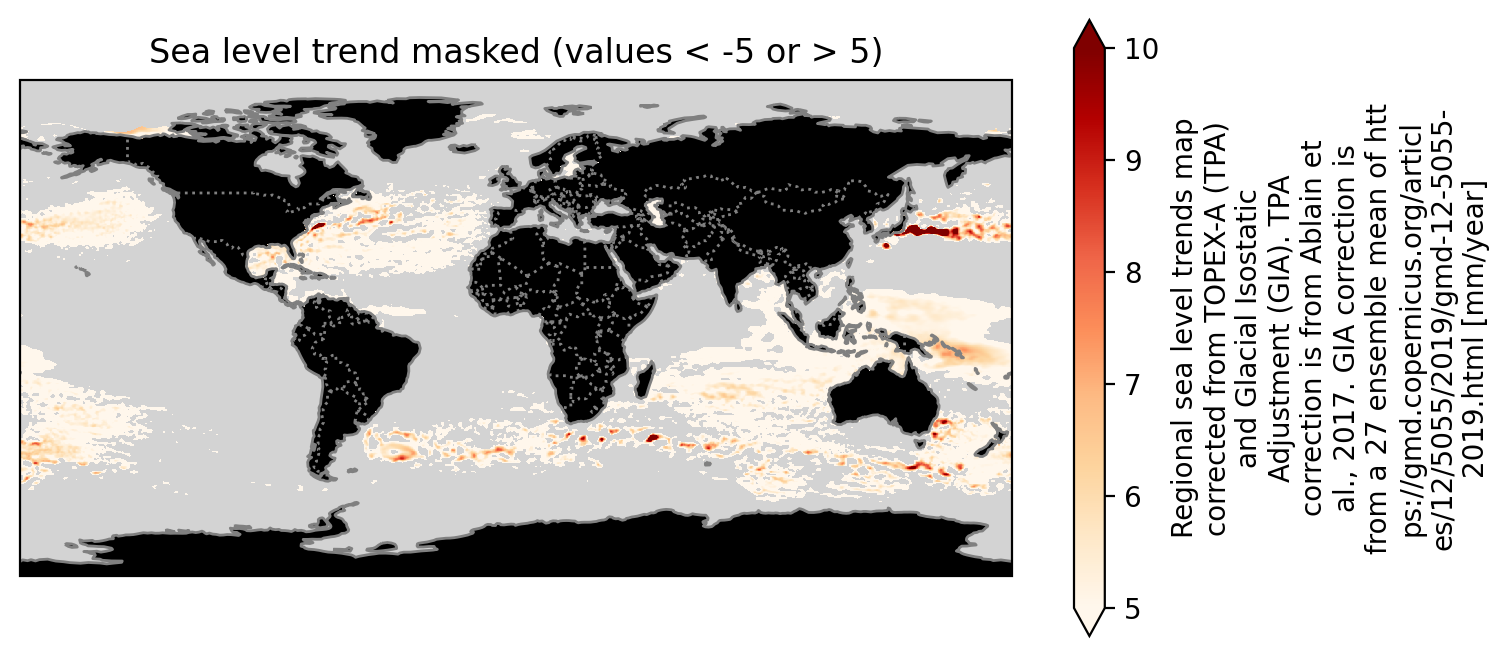

In [29]:
# cartopy projection
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# masked sea level trend data
masked_sea_level_trend.plot(ax=ax, cmap='OrRd', vmin=5, vmax=10)

# cartopy land feature
ax.add_feature(cfeature.LAND, facecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightgray')

# borders and coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')

# title and show the plot
plt.title('Sea level trend masked (values < -5 or > 5)')
plt.show()


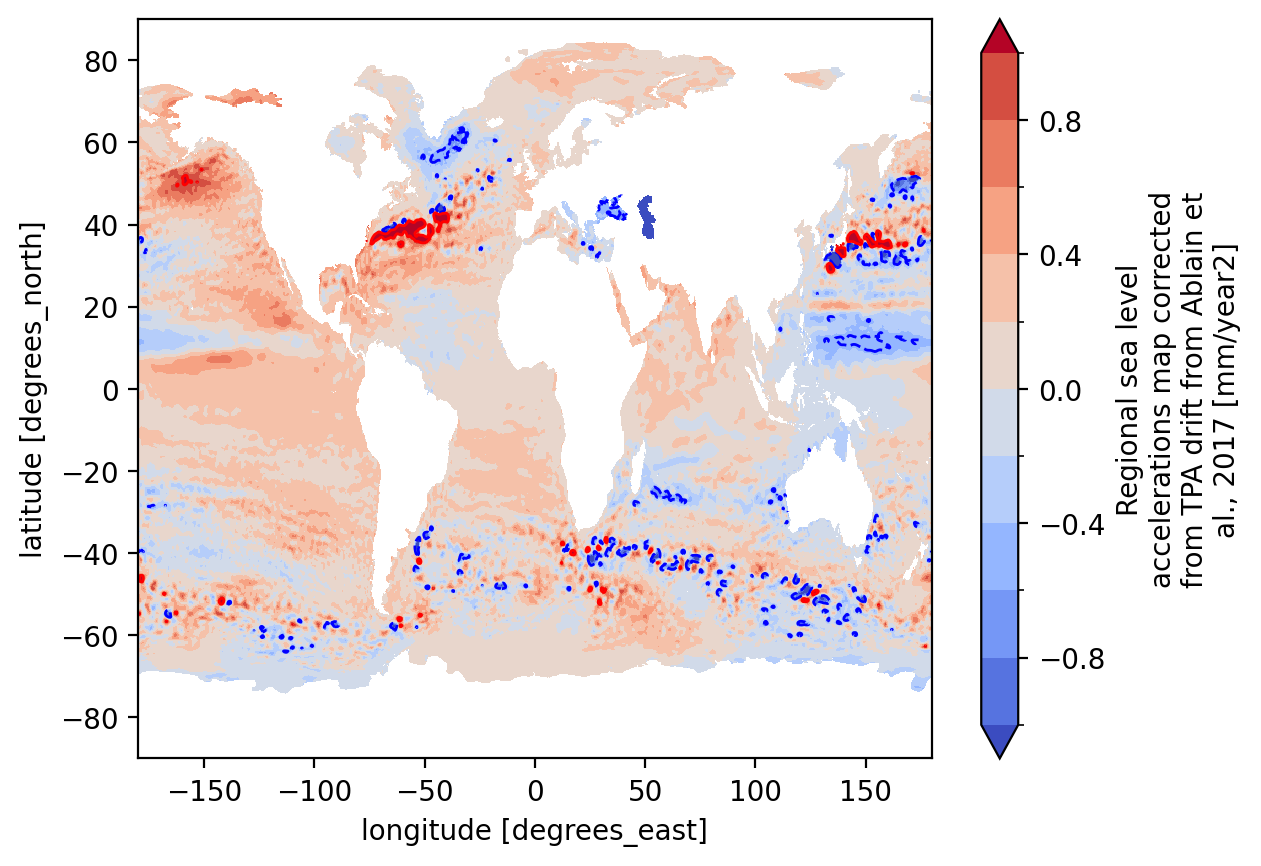

In [6]:
# Transpose and display acceleration map
sea_level_acceleration = sea_level_acceleration.transpose("latitude", "longitude")
sea_level_acceleration.plot(levels=np.linspace(-1,1,11), vmin=-1, vmax=1, cmap='coolwarm')
sea_level_acceleration.plot.contour(levels=[-.5, 1], colors=['b', 'r'], linewidths=1)

In [38]:
# Mask some values
masked_sea_level_acceleration = sea_level_acceleration.where((sea_level_acceleration < -.3) | (sea_level_acceleration > .3))

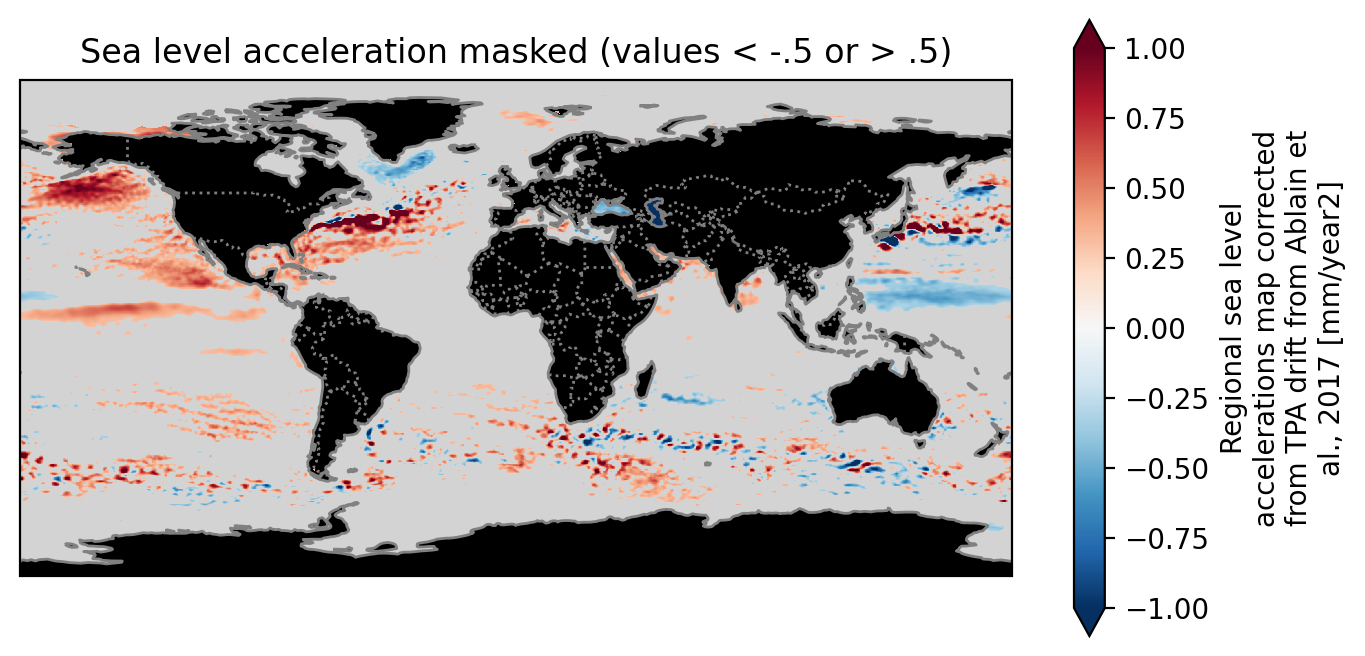

In [ ]:
# cartopy projection
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})

# masked sea level trend data
masked_sea_level_acceleration.plot(ax=ax, cmap='RdBu_r', vmin=-1, vmax=1)

# cartopy land feature
ax.add_feature(cfeature.LAND, facecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightgray')

# borders and coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')

# title and show the plot
plt.title('Sea level acceleration masked (values < -.3 or > .3)')
plt.show()